<i><b><font size = 4>
    Motivation: I am new to R, but I like the high quality plots made by ggplot2. I used to use python packages(numpy, pandas) to process data and use seaborn to make plots. In my personal opinion, numpy and pandas are easier to use than tidyverse. However, ggplot2 makes better plots. <br>
    So I think if I could use numpy and pandas to process the data and use ggplot to make the plots, that would be very convinient. So I tried to find ways to use ggplot in python. <br>
    The package I found is "plotnine", which is essentially the python version of ggplot. So I want to make a tutorial on how to use numpy and pandas to process data and use ggplot2 to make plots as we did in Rstudio. </font> </b></i>

<b>
<font size = 5>
Set Up
</font></b>

Firstly, we need anaconda installed on our laptop. Here is the link to install anaconda: https://www.anaconda.com/products/individual

After anaconda is installed, we can install jupyter notebook in the anaconda navigator. In addition to anaconda and jupyter notebook, we need one more package called "plotnine".You need to open up a Terminal, if you are using Mac OSX, or Linux (see instructions above), or launch an anaconda-promt, if you are using Windows. In your terminal window type the following:<br>
<i>conda install -y -c conda-forge plotnine<br></i>
After installing anaconda, type the following in the terminal:<br>
<i>jupyter notebook<br></i>
<b>Reference: <i>https://datacarpentry.org/python-ecology-lesson/setup.html#required-python-packages </i> for the setups.<br>
    <i>https://plotnine.readthedocs.io/en/stable/index.html </i> for the basics of plotnine package.<br>
    The following plots are made by myself
    </b>

<b>
<font size = 5>
Coding
</font></b>

In [9]:
from plotnine.data import mtcars
import plotnine as p9
import pandas as pd
import numpy as np

We use the mtcars dataset to illustrate

In [10]:
mtcars = pd.DataFrame(mtcars)
mtcars.head(5)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<b>Just like how we use pandas by calling <i> pd.function</i>: Since we imported plotnine as p9, we simply call <i>p9.function</i> to use any function in ggplot.</b> Except that, everything is almost the same as how we use ggplot in Rstudio!

<b>
<font size = 4>
Barplot
</font></b>

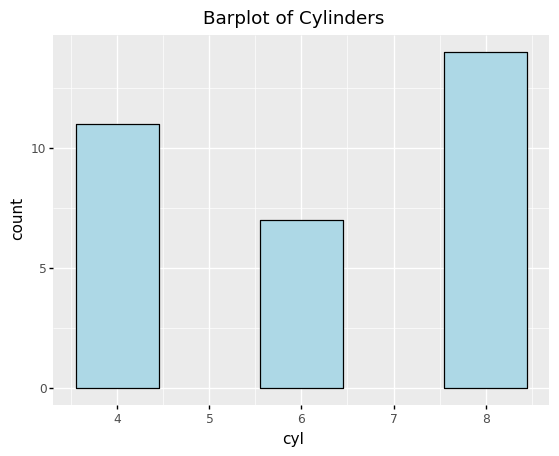

<ggplot: (162481642954)>

In [45]:
p9.ggplot(mtcars, p9.aes(x = 'cyl')) \
    + p9.geom_bar(fill = "lightblue", color = "black")\
    + p9.ggtitle('Barplot of Cylinders')

<b>
<font size = 4>
Histogram
</font></b>

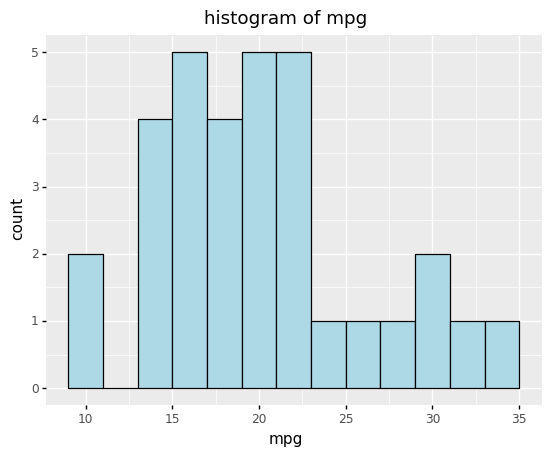

<ggplot: (162481813420)>

In [46]:
p9.ggplot(mtcars, p9.aes(x = 'mpg')) \
    + p9.geom_histogram(binwidth = 2, fill = "lightblue", color = "black")\
    + p9.ggtitle('histogram of mpg')

<b>
    Add a density line:
    </b>

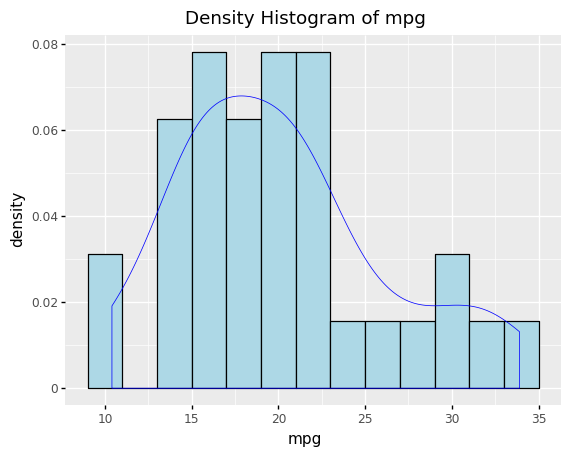

<ggplot: (162481850067)>

In [47]:
p9.ggplot(mtcars, p9.aes(x = 'mpg')) \
    + p9.geom_histogram(p9.aes(y = '..density..'), binwidth = 2, fill = "lightblue", color = "black")\
    + p9.geom_density(color = "blue", size = 0.3)\
    + p9.ggtitle("Density Histogram of mpg")

<font color = 'red'><i>Please Note: any ggplot arguments must be used within quotes. If we use  <b>p9.ggplot(mtcars, p9.aes(reorder('gear', -'mpg'),  'mpg') )</b> , this would not work. We have to use  <b>p9.ggplot(mtcars, p9.aes('reorder(gear, -mpg)',  'mpg') )</b> .<br>
Similarly,  <b>aes(y = ..density..)</b>  , which is the way we used to writing in Rstudio, would not work in python. We have to write it as :<b>p9.aes(y = '..density..')</b></i></font>

<b>
<font size = 4>
BoxPlot
</font></b>

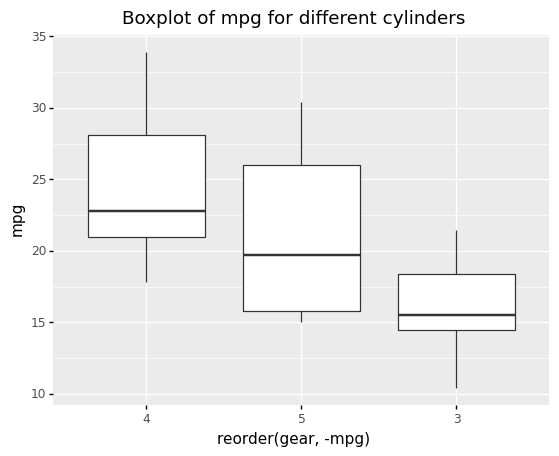

<ggplot: (162481635557)>

In [48]:
#change gear value from numerical to categorical
mtcars.gear = [str(x) for x in mtcars.gear]
#plot the box plot
p9.ggplot(mtcars, p9.aes('reorder(gear, -mpg)',  'mpg') )\
    + p9.geom_boxplot() \
    + p9.ggtitle("Boxplot of mpg for different cylinders")

<b>
<font size = 4>
Scatter Plot
</font></b>

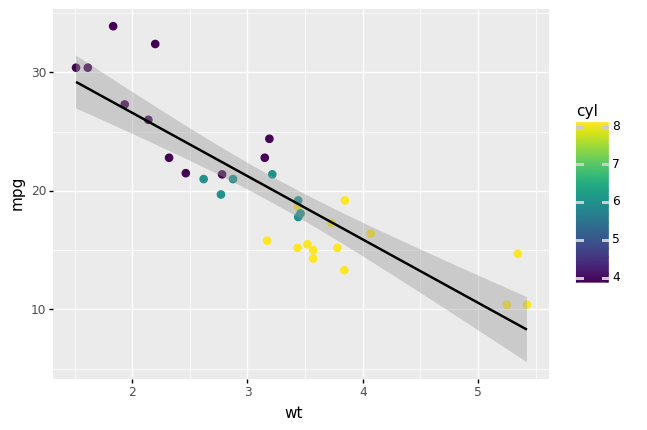

<ggplot: (162482997836)>

In [49]:
p9.ggplot(mtcars, p9.aes(x = 'wt', y = 'mpg', color = 'cyl')) \
    + p9.geom_point(size = 2.5)\
    + p9.stat_smooth(method='lm')

<b>
    Add facets:
    </b>

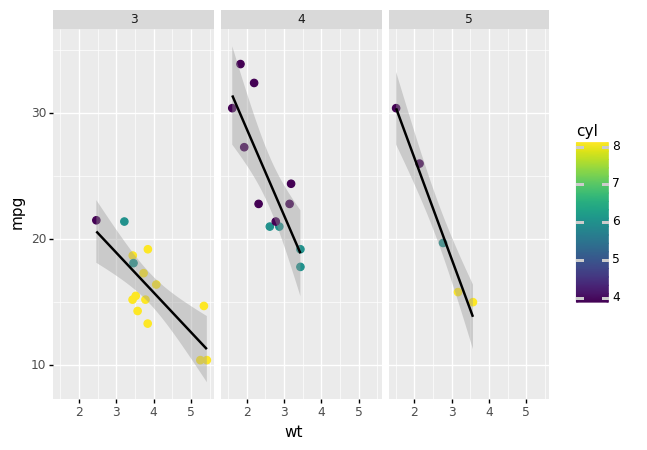

<ggplot: (162479928640)>

In [50]:
p9.ggplot(mtcars, p9.aes(x = 'wt', y = 'mpg', color = 'cyl')) \
    + p9.geom_point(size = 2.5)\
    + p9.stat_smooth(method='lm')\
    + p9.facet_wrap('gear')

<b>
<font size = 4>
Using numpy and pandas
</font></b>

As mentioned before, we can use numpy and pandas to process the data before we make plots

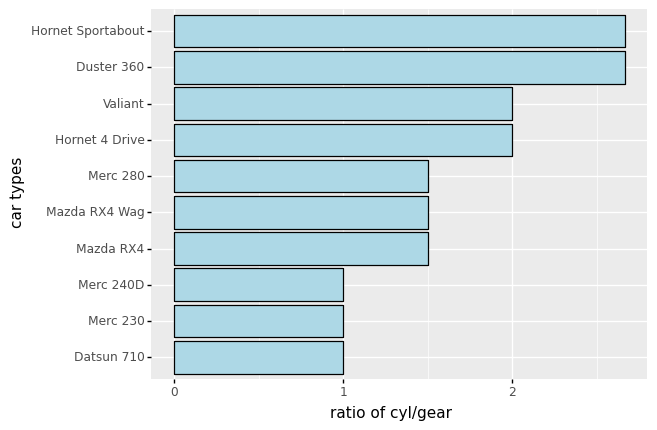

<ggplot: (162481443943)>

In [42]:
# first convert gear back to numbers
mtcars.gear = [int(x) for x in mtcars.gear]
#add a new column: the ratio of cyl/gear
mtcars['ratio'] = mtcars.cyl/mtcars.gear
p9.ggplot(mtcars[:10], p9.aes('reorder(name, ratio)', 'ratio'))\
    + p9.geom_col(fill = "lightblue", color = "black")\
    + p9.coord_flip()\
    + p9.ylab('ratio of cyl/gear')\
    + p9.xlab('car types')


<b>
    Using pandas groupby:
    </b>

In [43]:
# we can also use groupby in pandas
df = mtcars.groupby(['cyl','gear']).agg(['mean', 'median'])['mpg']
df.reset_index(inplace = True)
df

,cyl,gear,mean,median
0,4,3,21.500,21.50
1,4,4,26.925,25.85
2,4,5,28.200,28.20
3,6,3,19.750,19.75
4,6,4,19.750,20.10
5,6,5,19.700,19.70
6,8,3,15.050,15.20
7,8,5,15.400,15.40


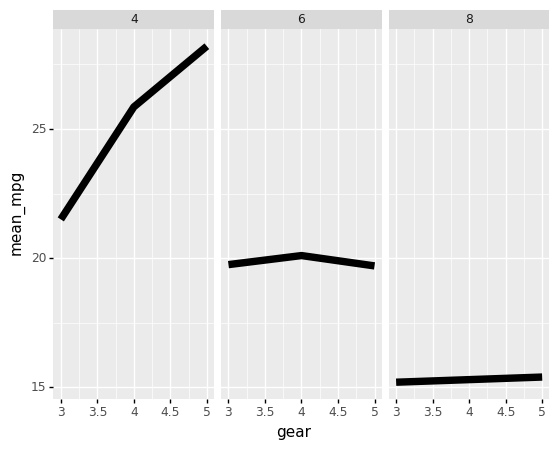

<ggplot: (162481640461)>

In [44]:
p9.ggplot(df, p9.aes(x = 'gear', y = 'median'))\
    + p9.geom_line(size = 3)\
    + p9.facet_wrap('cyl')\
    + p9.ylab('mean_mpg')